# Importing libraries and reading dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dataset=pd.read_csv("first inten project.csv")
dataset

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


# Data preprocessing 

/nulls detection/

In [7]:
dataset.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

/duplicates detection(only for booking_id other featuers are expected to have duplicates)/

In [10]:
dataset['Booking_ID'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36280    False
36281    False
36282    False
36283    False
36284    False
Name: Booking_ID, Length: 36285, dtype: bool

In [12]:
duplicates_count = dataset['Booking_ID'].duplicated().sum()
print(f'Total duplicates for {'Booking_ID'}: {duplicates_count}')

Total duplicates for Booking_ID: 0


/checking for correct datatypes/

In [15]:
print(dataset.dtypes)

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


/explore data ranges and categories for featuers/

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [20]:
print(dataset['type of meal'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [22]:
print(dataset['room type'].unique())

['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


In [24]:
print(dataset['market segment type'].unique())

['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [26]:
print(dataset['booking status'].unique())

['Not_Canceled' 'Canceled']


In [28]:
print(dataset['lead time'].min(), dataset['lead time'].max())

0 443


In [30]:
print(dataset['number of adults'].min(), dataset['number of adults'].max())

0 4


In [32]:
print(dataset['date of reservation'].min(), dataset['date of reservation'].max())

1/1/2018 9/9/2018


In [34]:
print(dataset['number of children'].min(), dataset['number of children'].max())

0 10


In [36]:
print(dataset['number of weekend nights'].min(), dataset['number of weekend nights'].max())

0 7


In [38]:
print(dataset['average price '].min(), dataset['average price '].max())

0.0 540.0


# Outliers

/detection function/

In [168]:
def detect_outliers(dataset):
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = dataset[~((dataset < lower_bound) | (dataset > upper_bound)).any(axis=1)]
    return df_no_outliers

/removing outliers function/

In [280]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

In [44]:
outliers = detect_outliers(dataset, 'lead time')

print(outliers)

      Booking_ID  number of adults  number of children  \
5       INN00006                 1                   0   
96      INN00097                 2                   0   
118     INN00119                 2                   0   
120     INN00121                 2                   0   
170     INN00171                 2                   0   
...          ...               ...                 ...   
36171   INN36172                 2                   0   
36178   INN36179                 2                   0   
36191   INN36192                 2                   0   
36248   INN36249                 2                   0   
36280   INN36282                 2                   0   

       number of weekend nights  number of week nights type of meal  \
5                             0                      2  Meal Plan 2   
96                            0                      2  Meal Plan 2   
118                           0                      1  Meal Plan 1   
120                

In [46]:
outliers = detect_outliers(dataset, 'average price ')

print(outliers)

      Booking_ID  number of adults  number of children  \
60      INN00061                 2                   2   
63      INN00064                 1                   0   
114     INN00115                 2                   2   
127     INN00128                 2                   2   
145     INN00146                 1                   0   
...          ...               ...                 ...   
36221   INN36222                 2                   2   
36227   INN36228                 2                   2   
36250   INN36251                 1                   0   
36263   INN36264                 1                   0   
36269   INN36270                 2                   2   

       number of weekend nights  number of week nights type of meal  \
60                            0                      1  Meal Plan 1   
63                            0                      1  Meal Plan 1   
114                           2                      2  Meal Plan 1   
127                

<Axes: xlabel='average price '>

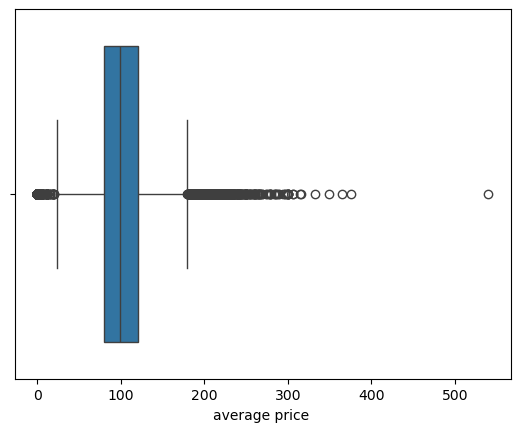

In [48]:
sns.boxplot(dataset['average price '], orient="h")

<Axes: xlabel='lead time'>

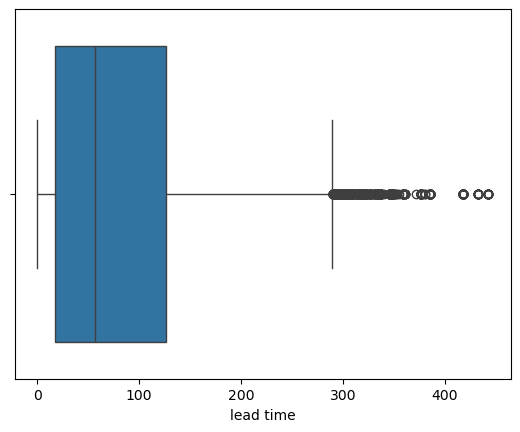

In [50]:
sns.boxplot(dataset['lead time'], orient="h")

"will not remeove any because there isn't an expected range for values"

# Feature engineering 

/performing feature standardization for wide range numerical featuers/

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset['lead time']=scaler.fit_transform(dataset[['lead time']])
dataset['average price ']=scaler.fit_transform(dataset[['average price ']])
dataset['number of adults']=scaler.fit_transform(dataset[['number of adults']])
dataset['number of children']=scaler.fit_transform(dataset[['number of children']])
dataset['number of weekend nights']=scaler.fit_transform(dataset[['number of weekend nights']])
dataset['number of week nights']=scaler.fit_transform(dataset[['number of week nights']])
dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,-1.628431,2.221609,1.366111,1.981250,Meal Plan 1,0,Room_Type 1,1.614661,Offline,0,0,0,-0.439538,0,10/2/2015,Not_Canceled
1,INN00002,-1.628431,-0.261636,0.217450,0.563741,Not Selected,0,Room_Type 1,-0.933699,Online,0,0,0,0.092868,1,11/6/2018,Not_Canceled
2,INN00003,0.299073,2.221609,0.217450,0.563741,Meal Plan 1,0,Room_Type 1,-0.980244,Online,0,0,0,-1.522592,0,2/28/2018,Canceled
3,INN00004,-1.628431,-0.261636,-0.931212,-0.145013,Meal Plan 1,0,Room_Type 1,1.463389,Online,0,0,0,-0.097521,1,5/20/2017,Canceled
4,INN00005,-1.628431,-0.261636,0.217450,-0.145013,Not Selected,0,Room_Type 1,-0.433336,Online,0,0,0,-0.753054,0,4/11/2018,Canceled


/extracting day,month,year/

In [62]:
dataset['date of reservation'] = pd.to_datetime(dataset['date of reservation'], errors='coerce')
dataset['year'] = dataset['date of reservation'].dt.year
dataset['month'] = dataset['date of reservation'].dt.month
dataset['day'] = dataset['date of reservation'].dt.day

In [64]:
dataset['year']=scaler.fit_transform(dataset[['year']])
dataset['month']=scaler.fit_transform(dataset[['month']])
dataset['day']=scaler.fit_transform(dataset[['day']])

dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,year,month,day
0,INN00001,-1.628431,2.221609,1.366111,1.981250,Meal Plan 1,0,Room_Type 1,1.614661,Offline,0,0,0,-0.439538,0,2015-10-02,Not_Canceled,-7.336542,0.838285,-1.555160
1,INN00002,-1.628431,-0.261636,0.217450,0.563741,Not Selected,0,Room_Type 1,-0.933699,Online,0,0,0,0.092868,1,2018-11-06,Not_Canceled,0.468012,1.164383,-1.097188
2,INN00003,0.299073,2.221609,0.217450,0.563741,Meal Plan 1,0,Room_Type 1,-0.980244,Online,0,0,0,-1.522592,0,2018-02-28,Canceled,0.468012,-1.770500,1.421658
3,INN00004,-1.628431,-0.261636,-0.931212,-0.145013,Meal Plan 1,0,Room_Type 1,1.463389,Online,0,0,0,-0.097521,1,2017-05-20,Canceled,-2.133506,-0.792206,0.505714
4,INN00005,-1.628431,-0.261636,0.217450,-0.145013,Not Selected,0,Room_Type 1,-0.433336,Online,0,0,0,-0.753054,0,2018-04-11,Canceled,0.468012,-1.118304,-0.524723


/encoding featuers/

In [67]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(dataset[['room type']])
ohetransform

,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
36280,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36281,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36282,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36283,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
dataset=pd.concat([dataset,ohetransform],axis=1)
pd.set_option('display.max_columns', None)
dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7
0,INN00001,-1.628431,2.221609,1.366111,1.981250,Meal Plan 1,0,Room_Type 1,1.614661,Offline,0,0,0,-0.439538,0,2015-10-02,Not_Canceled,-7.336542,0.838285,-1.555160,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INN00002,-1.628431,-0.261636,0.217450,0.563741,Not Selected,0,Room_Type 1,-0.933699,Online,0,0,0,0.092868,1,2018-11-06,Not_Canceled,0.468012,1.164383,-1.097188,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,INN00003,0.299073,2.221609,0.217450,0.563741,Meal Plan 1,0,Room_Type 1,-0.980244,Online,0,0,0,-1.522592,0,2018-02-28,Canceled,0.468012,-1.770500,1.421658,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,INN00004,-1.628431,-0.261636,-0.931212,-0.145013,Meal Plan 1,0,Room_Type 1,1.463389,Online,0,0,0,-0.097521,1,2017-05-20,Canceled,-2.133506,-0.792206,0.505714,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,INN00005,-1.628431,-0.261636,0.217450,-0.145013,Not Selected,0,Room_Type 1,-0.433336,Online,0,0,0,-0.753054,0,2018-04-11,Canceled,0.468012,-1.118304,-0.524723,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(dataset[['type of meal']])
ohetransform

,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
36280,0.0,1.0,0.0,0.0
36281,1.0,0.0,0.0,0.0
36282,1.0,0.0,0.0,0.0
36283,1.0,0.0,0.0,0.0


In [73]:
dataset=pd.concat([dataset,ohetransform],axis=1)
pd.set_option('display.max_columns', None)
dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,INN00001,-1.628431,2.221609,1.366111,1.981250,Meal Plan 1,0,Room_Type 1,1.614661,Offline,0,0,0,-0.439538,0,2015-10-02,Not_Canceled,-7.336542,0.838285,-1.555160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,INN00002,-1.628431,-0.261636,0.217450,0.563741,Not Selected,0,Room_Type 1,-0.933699,Online,0,0,0,0.092868,1,2018-11-06,Not_Canceled,0.468012,1.164383,-1.097188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN00003,0.299073,2.221609,0.217450,0.563741,Meal Plan 1,0,Room_Type 1,-0.980244,Online,0,0,0,-1.522592,0,2018-02-28,Canceled,0.468012,-1.770500,1.421658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,INN00004,-1.628431,-0.261636,-0.931212,-0.145013,Meal Plan 1,0,Room_Type 1,1.463389,Online,0,0,0,-0.097521,1,2017-05-20,Canceled,-2.133506,-0.792206,0.505714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,INN00005,-1.628431,-0.261636,0.217450,-0.145013,Not Selected,0,Room_Type 1,-0.433336,Online,0,0,0,-0.753054,0,2018-04-11,Canceled,0.468012,-1.118304,-0.524723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(dataset[['market segment type']])
ohetransform

,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
36280,0.0,0.0,0.0,0.0,1.0
36281,0.0,0.0,0.0,0.0,1.0
36282,0.0,0.0,0.0,0.0,1.0
36283,0.0,0.0,0.0,1.0,0.0


In [77]:
dataset=pd.concat([dataset,ohetransform],axis=1)
pd.set_option('display.max_columns', None)
dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,INN00001,-1.628431,2.221609,1.366111,1.981250,Meal Plan 1,0,Room_Type 1,1.614661,Offline,0,0,0,-0.439538,0,2015-10-02,Not_Canceled,-7.336542,0.838285,-1.555160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,INN00002,-1.628431,-0.261636,0.217450,0.563741,Not Selected,0,Room_Type 1,-0.933699,Online,0,0,0,0.092868,1,2018-11-06,Not_Canceled,0.468012,1.164383,-1.097188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,INN00003,0.299073,2.221609,0.217450,0.563741,Meal Plan 1,0,Room_Type 1,-0.980244,Online,0,0,0,-1.522592,0,2018-02-28,Canceled,0.468012,-1.770500,1.421658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,INN00004,-1.628431,-0.261636,-0.931212,-0.145013,Meal Plan 1,0,Room_Type 1,1.463389,Online,0,0,0,-0.097521,1,2017-05-20,Canceled,-2.133506,-0.792206,0.505714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,INN00005,-1.628431,-0.261636,0.217450,-0.145013,Not Selected,0,Room_Type 1,-0.433336,Online,0,0,0,-0.753054,0,2018-04-11,Canceled,0.468012,-1.118304,-0.524723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [79]:
dataset['booking status']=dataset['booking status'].replace("Not_Canceled",0)
dataset['booking status']=dataset['booking status'].replace("Canceled",1)
dataset['booking status']

C:\Users\user\AppData\Local\Temp\ipykernel_4900\1892961463.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['booking status']=dataset['booking status'].replace("Canceled",1)


0        0
1        0
2        1
3        1
4        1
        ..
36280    1
36281    0
36282    0
36283    0
36284    0
Name: booking status, Length: 36285, dtype: int64

/dropping unnecessary columns/

In [82]:
dataset = dataset.drop('Booking_ID', axis=1)
dataset = dataset.drop('room type', axis=1)
dataset = dataset.drop('type of meal', axis=1)
dataset = dataset.drop('market segment type', axis=1)
dataset = dataset.drop('date of reservation', axis=1)

In [86]:
dataset

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,-1.628431,2.221609,1.366111,1.981250,0,1.614661,0,0,0,-0.439538,0,0,-7.336542,0.838285,-1.555160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.628431,-0.261636,0.217450,0.563741,0,-0.933699,0,0,0,0.092868,1,0,0.468012,1.164383,-1.097188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.299073,2.221609,0.217450,0.563741,0,-0.980244,0,0,0,-1.522592,0,1,0.468012,-1.770500,1.421658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.628431,-0.261636,-0.931212,-0.145013,0,1.463389,0,0,0,-0.097521,1,1,-2.133506,-0.792206,0.505714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.628431,-0.261636,0.217450,-0.145013,0,-0.433336,0,0,0,-0.753054,0,1,0.468012,-1.118304,-0.524723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,0.299073,-0.261636,-0.931212,-0.145013,0,3.034296,0,0,0,0.330000,1,1,0.468012,0.512187,-0.295737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36281,0.299073,-0.261636,0.217450,0.563741,0,-0.596245,0,0,0,0.117664,1,0,-2.133506,0.838285,-0.066751,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36282,0.299073,-0.261636,0.217450,0.563741,0,-0.026064,0,0,0,0.062371,1,0,0.468012,1.490481,1.192672,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36283,2.226577,-0.261636,-0.931212,1.272496,0,0.416118,0,0,0,-0.185876,1,0,0.468012,-0.140009,-1.097188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# checking outliers after preprocessing 

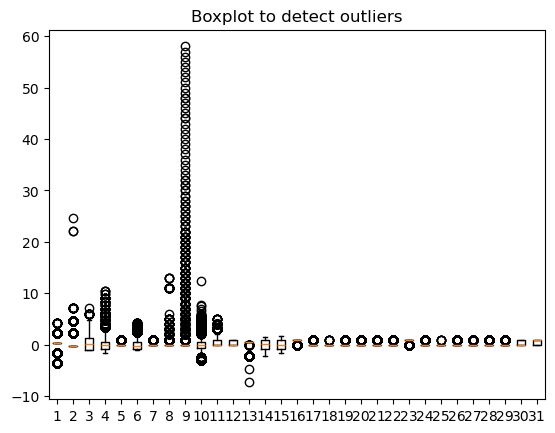

In [236]:
plt.boxplot(dataset)
plt.title('Boxplot to detect outliers')
plt.show()

# removing outliers

In [286]:
upper_limit=dataset['P-not-C'].mean()+3*dataset['P-not-C'].std()
lower_limit=dataset['P-not-C'].mean()-3*dataset['P-not-C'].std()
print('upper limit:' , upper_limit)
print('lower limit:' , lower_limit)

upper limit: 5.415161607339253
lower limit: -5.108423285718749


In [288]:
dataset.loc[(dataset['P-not-C']> upper_limit) | (dataset['P-not-C']<lower_limit)]

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
377,-1.628431,-0.261636,-0.931212,-0.853767,0,-0.991881,1,0,12,-1.095071,0,0,0.468012,-1.444402,0.849193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
392,-1.628431,-0.261636,-0.931212,-0.853767,1,-0.782426,1,3,19,-1.038068,0,0,0.468012,0.838285,0.276728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
776,-1.628431,-0.261636,-0.931212,0.563741,0,0.067027,1,3,15,-1.095071,0,0,0.468012,0.512187,-0.181244,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
800,-1.628431,-0.261636,-0.931212,-0.853767,0,0.229936,1,3,17,-1.095071,0,0,0.468012,0.512187,1.421658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
897,-1.628431,-0.261636,-0.931212,-0.853767,0,-0.968608,1,2,7,-2.947662,3,0,0.468012,0.838285,-1.097188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35733,0.299073,-0.261636,-0.931212,-0.853767,1,-0.991881,1,0,7,-1.665099,2,0,0.468012,-1.444402,-0.066751,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35880,-1.628431,-0.261636,-0.931212,-0.853767,0,-0.933699,1,0,10,-1.066569,1,0,0.468012,-1.770500,-0.639216,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35983,-1.628431,-0.261636,-0.931212,-0.853767,0,-0.991881,1,4,17,-2.947662,1,0,0.468012,-0.466108,-0.982695,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35999,-1.628431,-0.261636,0.217450,-0.853767,1,-0.956972,1,0,8,-1.038068,1,0,0.468012,-0.466108,0.505714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [298]:
new_ds=dataset.loc[(dataset['P-not-C']<upper_limit)&(dataset['P-not-C'] >lower_limit)]
print('before removing',len(dataset))
print('after removing',len(new_ds))
print('outliers:',len(dataset)-len(new_ds))

before removing 36285
after removing 35893
outliers: 392


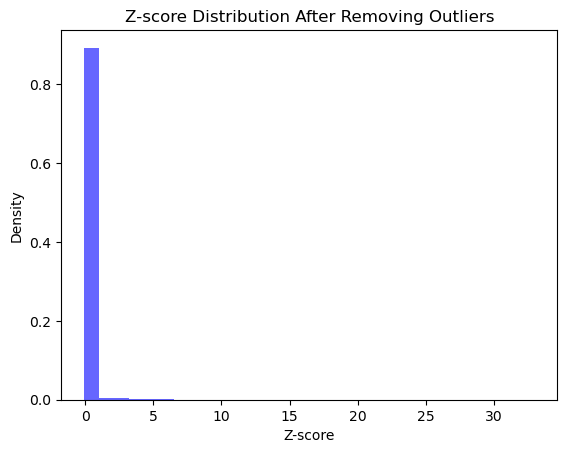

In [361]:
from scipy import stats
z_scores = stats.zscore(new_ds['P-not-C'])
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='b')
plt.title('Z-score Distribution After Removing Outliers')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.show()

In [296]:
upper_limit=dataset['average price '].mean()+3*dataset['average price '].std()
lower_limit=dataset['P-not-C'].mean()-3*dataset['P-not-C'].std()
print('upper limit:' , upper_limit)
print('lower limit:' , lower_limit)
dataset.loc[(dataset['average price ']> upper_limit) | (dataset['average price ']<lower_limit)]

upper limit: 3.0000413402509523
lower limit: -5.108423285718749


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
60,0.299073,4.704855,-0.931212,-0.853767,1,-0.968608,0,0,0,4.405701,1,0,0.468012,0.512187,-1.555160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
162,2.226577,-0.261636,1.366111,-0.145013,0,-0.956972,0,0,0,3.197241,1,0,0.468012,0.838285,-0.982695,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311,0.299073,4.704855,-0.931212,-0.145013,0,-0.735881,0,0,0,3.864174,2,0,0.468012,0.512187,0.047742,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
388,0.299073,4.704855,-0.931212,-0.853767,0,-0.991881,0,0,0,3.351149,0,1,0.468012,-0.792206,-0.181244,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
648,0.299073,-0.261636,-0.931212,0.563741,0,-0.328609,0,0,0,3.311247,0,1,0.468012,1.490481,1.536151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36057,0.299073,-0.261636,1.366111,-0.145013,0,-0.805699,0,0,0,3.037633,2,0,-2.133506,0.512187,1.192672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36098,0.299073,4.704855,-0.931212,-0.853767,0,-0.794063,0,0,0,3.439503,2,0,0.468012,0.512187,0.620207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36133,2.226577,-0.261636,-0.931212,-0.853767,0,-0.991881,0,0,0,3.465155,2,0,0.468012,0.186089,0.849193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36227,0.299073,4.704855,-0.931212,-0.853767,0,-0.759154,0,0,0,3.636163,1,0,0.468012,0.186089,-1.097188,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [300]:
new_ds=dataset.loc[(dataset['average price ']<upper_limit)&(dataset['average price '] >lower_limit)]
print('before removing',len(dataset))
print('after removing',len(new_ds))
print('outliers:',len(dataset)-len(new_ds))

before removing 36285
after removing 35928
outliers: 357


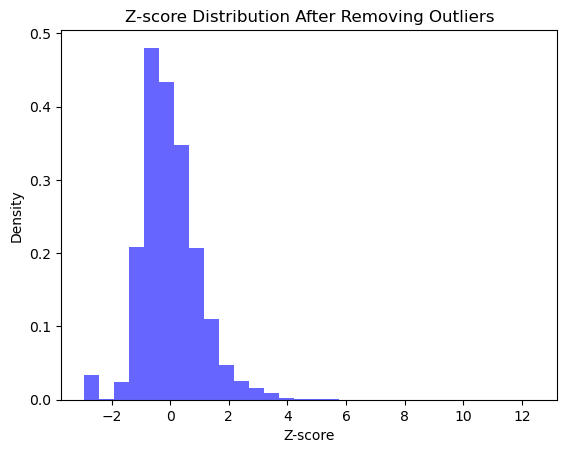

In [359]:
from scipy import stats
z_scores = stats.zscore(new_ds['average price '])
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='b')
plt.title('Z-score Distribution After Removing Outliers')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.show()

In [302]:
upper_limit=dataset['lead time'].mean()+3*dataset['lead time'].std()
lower_limit=dataset['lead time'].mean()-3*dataset['lead time'].std()
print('upper limit:' , upper_limit)
print('lower limit:' , lower_limit)
dataset.loc[(dataset['lead time']> upper_limit) | (dataset['lead time']<lower_limit)]

upper limit: 3.000041340250972
lower limit: -3.000041340250972


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
5,-1.628431,-0.261636,-0.931212,-0.145013,0,3.034296,0,0,0,-0.097521,1,1,-4.735024,0.512187,-0.295737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
118,0.299073,-0.261636,-0.931212,-0.853767,0,4.163022,0,0,0,-1.095071,0,1,0.468012,-1.118304,1.536151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
199,0.299073,-0.261636,0.217450,-0.145013,0,3.872113,0,0,0,0.101988,0,1,0.468012,0.512187,1.192672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,0.299073,-0.261636,-0.931212,0.563741,0,4.046658,0,0,0,-0.952564,0,1,0.468012,0.512187,-0.868202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
369,0.299073,-0.261636,1.366111,-1.562521,0,3.499750,0,0,0,0.330000,1,1,0.468012,0.838285,0.849193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35630,0.299073,-0.261636,2.514773,3.398758,0,3.092478,0,0,0,-0.500816,3,0,0.468012,1.490481,0.849193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35656,0.299073,-0.261636,-0.931212,-0.853767,0,4.163022,0,0,0,-1.095071,0,1,0.468012,-1.118304,1.536151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36006,0.299073,-0.261636,-0.931212,-0.145013,0,3.395023,0,0,0,0.330000,1,1,0.468012,0.838285,-0.181244,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36178,0.299073,-0.261636,1.366111,-1.562521,0,3.499750,0,0,0,0.330000,1,1,0.468012,0.838285,0.849193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [304]:
new_ds=dataset.loc[(dataset['lead time']<upper_limit)&(dataset['lead time'] >lower_limit)]
print('before removing',len(dataset))
print('after removing',len(new_ds))
print('outliers:',len(dataset)-len(new_ds))

before removing 36285
after removing 35908
outliers: 377


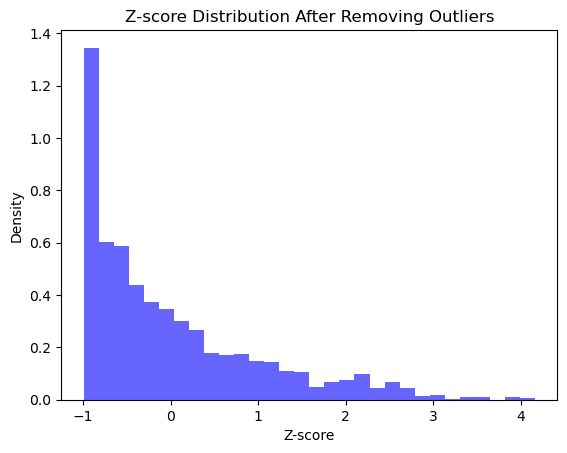

In [355]:
from scipy import stats
z_scores = stats.zscore(new_ds['lead time'])
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='b')
plt.title('Z-score Distribution After Removing Outliers')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.show()

In [306]:
upper_limit=dataset['P-C'].mean()+3*dataset['P-C'].std()
lower_limit=dataset['P-C'].mean()-3*dataset['P-C'].std()
print('upper limit:' , upper_limit)
print('lower limit:' , lower_limit)
dataset.loc[(dataset['P-C']> upper_limit) | (dataset['P-C']<lower_limit)]

upper limit: 1.128185654093011
lower limit: -1.0814996957080036


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
145,-1.628431,-0.261636,-0.931212,-0.145013,0,-0.840608,1,3,5,-2.947662,1,0,0.468012,-0.466108,-1.669653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
392,-1.628431,-0.261636,-0.931212,-0.853767,1,-0.782426,1,3,19,-1.038068,0,0,0.468012,0.838285,0.276728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
776,-1.628431,-0.261636,-0.931212,0.563741,0,0.067027,1,3,15,-1.095071,0,0,0.468012,0.512187,-0.181244,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
800,-1.628431,-0.261636,-0.931212,-0.853767,0,0.229936,1,3,17,-1.095071,0,0,0.468012,0.512187,1.421658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
897,-1.628431,-0.261636,-0.931212,-0.853767,0,-0.968608,1,2,7,-2.947662,3,0,0.468012,0.838285,-1.097188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34909,0.299073,-0.261636,1.366111,-0.145013,0,-0.956972,1,11,10,-0.664699,1,0,0.468012,-2.096598,0.047742,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35716,-1.628431,-0.261636,0.217450,-0.145013,0,-0.991881,1,2,20,-1.095071,1,0,0.468012,-1.770500,-0.066751,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35983,-1.628431,-0.261636,-0.931212,-0.853767,0,-0.991881,1,4,17,-2.947662,1,0,0.468012,-0.466108,-0.982695,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36079,-1.628431,-0.261636,-0.931212,-0.853767,1,-0.991881,1,11,0,-0.738803,0,0,0.468012,-2.096598,-0.982695,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [308]:
new_ds=dataset.loc[(dataset['P-C']<upper_limit)&(dataset['P-C'] >lower_limit)]
print('before removing',len(dataset))
print('after removing',len(new_ds))
print('outliers:',len(dataset)-len(new_ds))

before removing 36285
after removing 36145
outliers: 140


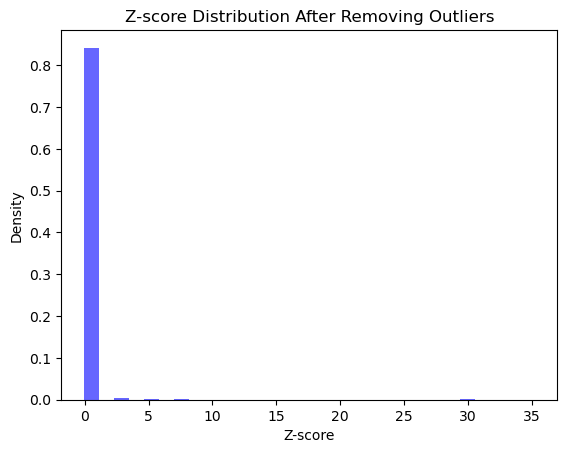

In [353]:
from scipy import stats
z_scores = stats.zscore(new_ds['P-C'])
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='b')
plt.title('Z-score Distribution After Removing Outliers')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.show()

In [310]:
upper_limit=dataset['number of week nights'].mean()+3*dataset['number of week nights'].std()
lower_limit=dataset['number of week nights'].mean()-3*dataset['number of week nights'].std()
print('upper limit:' , upper_limit)
print('lower limit:' , lower_limit)
dataset.loc[(dataset['number of week nights']> upper_limit) | (dataset['number of week nights']<lower_limit)]

upper limit: 3.00004134025151
lower limit: -3.00004134025151


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
194,0.299073,-0.261636,3.663434,5.525021,0,0.718663,0,0,0,0.440585,1,1,0.468012,0.186089,-1.440667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
380,0.299073,-0.261636,3.663434,6.233775,0,1.765934,0,0,0,0.376172,1,1,0.468012,0.512187,-0.295737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
477,0.299073,-0.261636,2.514773,3.398758,0,1.533207,0,0,0,-1.618642,1,0,0.468012,1.490481,-1.211681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
539,-1.628431,-0.261636,5.960757,9.068792,0,-0.852244,0,0,0,0.702228,0,1,0.468012,-1.444402,1.650644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
554,-1.628431,4.704855,3.663434,4.816267,0,-0.642790,0,0,0,2.359870,0,1,0.468012,1.164383,-1.555160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35784,0.299073,-0.261636,3.663434,4.107512,0,-0.933699,0,0,0,0.097143,0,1,0.468012,-1.770500,-0.410230,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35904,0.299073,4.704855,3.663434,5.525021,0,-0.491518,0,0,0,1.914963,0,1,0.468012,-1.444402,1.078179,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36130,0.299073,-0.261636,1.366111,3.398758,0,0.369572,0,0,0,-0.371135,1,0,0.468012,1.490481,0.505714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36163,-1.628431,-0.261636,5.960757,7.651283,0,0.195027,0,0,0,0.831624,1,1,0.468012,-0.792206,-0.066751,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [312]:
new_ds=dataset.loc[(dataset['number of weekend nights']<upper_limit)&(dataset['number of weekend nights'] >lower_limit)]
print('before removing',len(dataset))
print('after removing',len(new_ds))
print('outliers:',len(dataset)-len(new_ds))

before removing 36285
after removing 36101
outliers: 184


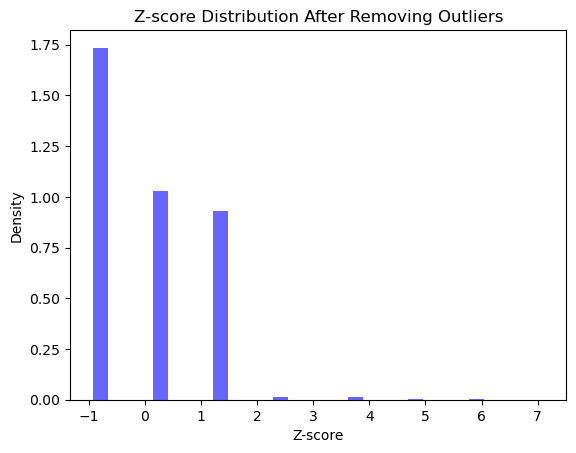

In [351]:
from scipy import stats
z_scores = stats.zscore(new_ds['number of weekend nights'])
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='b')
plt.title('Z-score Distribution After Removing Outliers')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.show()

In [316]:
upper_limit=dataset['year'].mean()+3*dataset['year'].std()
lower_limit=dataset['year'].mean()-3*dataset['year'].std()
print('upper limit:' , upper_limit)
print('lower limit:' , lower_limit)
dataset.loc[(dataset['year']> upper_limit) | (dataset['year']<lower_limit)]

upper limit: 2.9985113713755744
lower limit: -2.9985113713761162


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,-1.628431,2.221609,1.366111,1.981250,0,1.614661,0,0,0,-0.439538,0,0,-7.336542,0.838285,-1.555160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-1.628431,-0.261636,-0.931212,-0.145013,0,3.034296,0,0,0,-0.097521,1,1,-4.735024,0.512187,-0.295737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [318]:
new_ds=dataset.loc[(dataset['year']<upper_limit)&(dataset['year'] >lower_limit)]
print('before removing',len(dataset))
print('after removing',len(new_ds))
print('outliers:',len(dataset)-len(new_ds))

before removing 36285
after removing 36283
outliers: 2


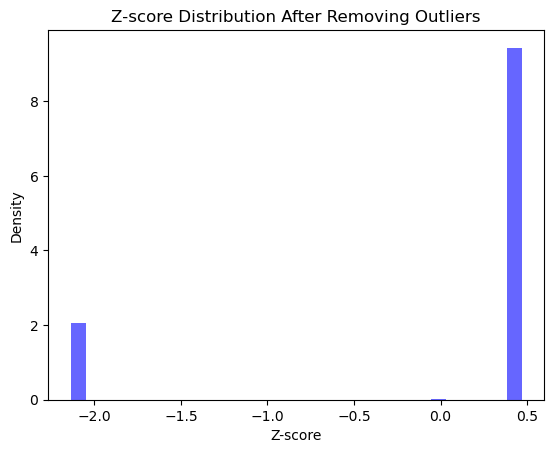

In [349]:
from scipy import stats
z_scores = stats.zscore(new_ds['year'])
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='b')
plt.title('Z-score Distribution After Removing Outliers')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.show()

# nothing changed ! :)

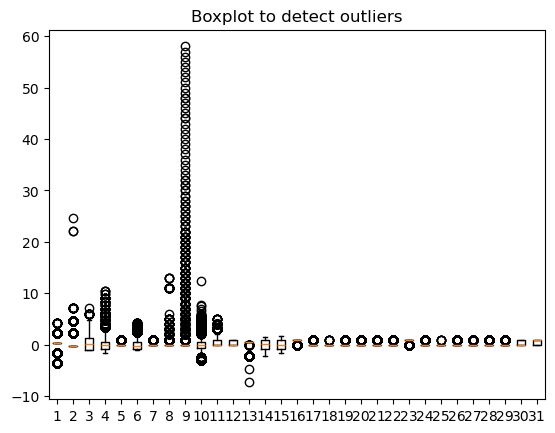

In [320]:
plt.boxplot(dataset)
plt.title('Boxplot to detect outliers')
plt.show()

# using random forest for feature selection 

In [322]:
missing_values = dataset.isnull().sum()
print(missing_values)

number of adults                     0
number of children                   0
number of weekend nights             0
number of week nights                0
car parking space                    0
lead time                            0
repeated                             0
P-C                                  0
P-not-C                              0
average price                        0
special requests                     0
booking status                       0
year                                 0
month                                0
day                                  0
room type_Room_Type 1                0
room type_Room_Type 2                0
room type_Room_Type 3                0
room type_Room_Type 4                0
room type_Room_Type 5                0
room type_Room_Type 6                0
room type_Room_Type 7                0
type of meal_Meal Plan 1             0
type of meal_Meal Plan 2             0
type of meal_Meal Plan 3             0
type of meal_Not Selected

In [129]:
dataset['year'].fillna(0, inplace=True)
dataset['month'].fillna(0, inplace=True)
dataset['day'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4900\4124830112.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['year'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4900\4124830112.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [131]:
missing_values = dataset.isnull().sum()
print(missing_values)

number of adults                     0
number of children                   0
number of weekend nights             0
number of week nights                0
car parking space                    0
lead time                            0
repeated                             0
P-C                                  0
P-not-C                              0
average price                        0
special requests                     0
booking status                       0
year                                 0
month                                0
day                                  0
room type_Room_Type 1                0
room type_Room_Type 2                0
room type_Room_Type 3                0
room type_Room_Type 4                0
room type_Room_Type 5                0
room type_Room_Type 6                0
room type_Room_Type 7                0
type of meal_Meal Plan 1             0
type of meal_Meal Plan 2             0
type of meal_Meal Plan 3             0
type of meal_Not Selected

In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = dataset.drop('booking status', axis=1)  
y = dataset['booking status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

In [326]:
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                              Feature  Importance
5                           lead time    0.312245
9                      average price     0.155387
10                   special requests    0.106130
13                                day    0.095575
12                              month    0.080228
3               number of week nights    0.052967
2            number of weekend nights    0.037111
29         market segment type_Online    0.028685
11                               year    0.026710
0                    number of adults    0.024532
28        market segment type_Offline    0.015531
22           type of meal_Meal Plan 2    0.009034
21           type of meal_Meal Plan 1    0.007682
1                  number of children    0.007246
14              room type_Room_Type 1    0.006714
4                   car parking space    0.006359
27      market segment type_Corporate    0.005925
17              room type_Room_Type 4    0.005521
24          type of meal_Not Selected    0.005345


In [328]:
top_n = 10
selected_features = importance_df['Feature'].head(top_n).values
X_selected = X_train[selected_features]


In [330]:
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_selected, y_train)
X_test_selected = X_test[selected_features]
y_pred = rf_model_selected.predict(X_test_selected)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)

Accuracy with selected features: 0.9013366404850489


# training on different models

In [332]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_selected, y_train)
y_pred_dt = dt.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.8626154058150751


In [334]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_selected, y_train)
y_pred_svc = svc.predict(X_test_selected)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc}")

SVM Accuracy: 0.8456662532727022


In [336]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.8029488769463966
